# Medical Insurance Premium Prediction

The Medical Insurance Premium Prediction project involves predicting the insurance premium that individuals are likely to pay based on various factors such as age, gender, BMI (Body Mass Index), smoking habits, region, and number of dependents. The goal is to develop a predictive model that can accurately estimate insurance premiums for new individuals based on their demographic and health-related attributes.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing Dataset

In [2]:
dataframe = pd.read_csv('insurance.csv')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process. It involves examining and understanding the structure, patterns, and characteristics of the data before applying any specific modeling techniques. EDA helps to uncover insights, identify patterns, detect anomalies, and make informed decisions about data preprocessing and modeling strategies.

In [3]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataframe.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
dataframe.shape

(1338, 7)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataframe.select_dtypes(include = 'object').head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
dataframe.select_dtypes(include = ['int64', 'float64']).head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [11]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
dataframe.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [14]:
dataframe.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [15]:
dataframe.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


# Handeling Missing Values

In [16]:
dataframe.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
dataframe.isna().sum().any()

False

In [22]:
dataframe.isna().values.any()

False

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [23]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Encoding Categorical Values

Encoding in the context of machine learning refers to the process of converting categorical or textual data into a numerical representation that can be used by machine learning algorithms.

In [24]:
dataframe.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
dataframe = pd.get_dummies(data = dataframe, drop_first = True)

In [29]:
dataframe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [30]:
dataframe.shape

(1338, 9)

# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [31]:
dataset = dataframe.drop('charges', axis = 1)

<AxesSubplot:title={'center':'Correlation With Charges'}>

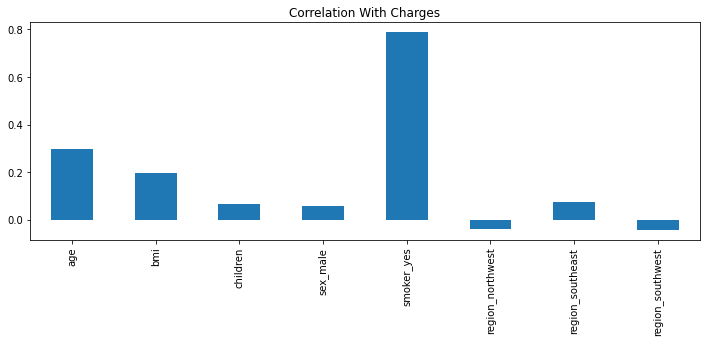

In [35]:
dataset.corrwith(dataframe['charges']).plot.bar(
    figsize = (12, 4), 
    title = 'Correlation With Charges',
    rot = 90
)

In [36]:
corr_matrix = dataframe.corr()

In [37]:
corr_matrix

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<AxesSubplot:>

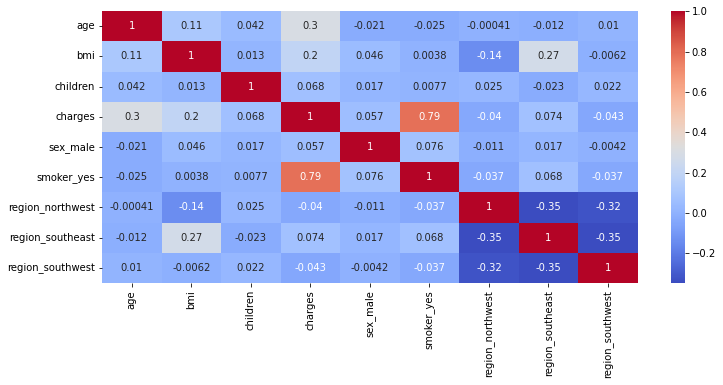

In [38]:
plt.figure(figsize = (12, 5))
sns.heatmap(
    corr_matrix, 
    annot = True, 
    cmap = 'coolwarm'
)

In [39]:
dataframe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [40]:
x = dataframe.drop('charges', axis = 1)
y = dataframe['charges']

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 42
)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

StandardScaler follows the concept of standardization, also known as Z-score normalization. It transforms the features such that they have a mean of 0 and a standard deviation of 1. This process centers the feature distribution around 0 and scales it to a standard deviation of 1.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
x_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [49]:
x_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

# Linear Regression

Linear regression is a statistical method used to predict a continuous outcome based on one or more input variables. It assumes a linear relationship between the input variables and the target variable. The formula for linear regression can be represented as y = β0 + β1 * x, where y is the predicted outcome, x is the input variable, β0 is the y-intercept, and β1 is the slope of the line. The goal of linear regression is to find the best-fit line that minimizes the difference between the predicted values and the actual values in the training data. This line is then used to make predictions on new data points by substituting the input values into the equation.

y = β0 + β1 * x

In [51]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = linear_reg.predict(x_test)

# R2 Score

The R-squared (R2) score, also known as the coefficient of determination, is a statistical measure used to evaluate the goodness of fit of a regression model. It represents the proportion of the variance in the dependent variable that can be explained by the independent variables in the model.

Mathematically, the R2 score is calculated as:

R2 = 1 - (SSres / SStot)

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test, y_pred)

0.7835929767120722

# Random Forest Regressor

Random Forest Regressor is a machine learning algorithm that belongs to the ensemble learning category. It is a popular and powerful algorithm used for regression tasks. Random Forest Regressor combines the principles of decision trees and bagging to create an ensemble of decision trees and make predictions.

In [55]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = random.predict(x_test)

In [57]:
r2_score(y_test, y_pred)

0.8659883392330054

In [62]:
dataframe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Prediction On Dummy Data

# 1st Prediction

Name = Luffy
Age = 20
bmi = 28.88
children = 0
sex = male
smoker = no
region = southeast

In [68]:
luffy_obs = [[20, 28.88, 0, 0, 1, 0, 0, 1]]

In [69]:
luffy_obs

[[20, 28.88, 0, 0, 1, 0, 0, 1]]

In [70]:
random.predict(scaler.transform(luffy_obs))

E:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([20301.9495053])

# 2nd Prediction

Name = yamato
Age = 24
bmi = 25.88
children = 2
sex = female
smoker = yes
region = southeast

In [71]:
yamato_obs = [[24, 25.88, 2, 0, 0, 0, 1, 1]]

In [72]:
yamato_obs

[[24, 25.88, 2, 0, 0, 0, 1, 1]]

In [73]:
random.predict(scaler.transform(yamato_obs))

E:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6071.6647559])